## LAB ØVELSE: Tid og tekst i Python

**Om øvelsen**

I denne øvelse skal anvendes teknikker inden for håndtering af tekstdata og datoer i Python. Øvelserne kan enten løses med basismoduler (fx `datetime`) eller via metoder i pandas. Der er flere måder at løse øvelserne på, men de vil kunne løses med de teknikker, som blev introduceret i de første tre Python sessioner i kurset.

**Formål**

Vi vil gerne undersøge udviklingen i, hvordan COVID-19 bliver diskuteret. Som case har vi udvalgt brancheforeningen Horesta (https://horesta.dk/). Som et første skridt i undersøgelsen, skal vi havde udvalgt de nyheder, som omhandler COVID-19.

**Om datasættet**

Datasættet består af alle nyheder fra Horesta fra april 2018 til starten af december 2020. Nyhederne er scrapet fra Horestas hjemmeside i starten af december 2020.

I finder datasættet i "data" mappen med navn "horesta_posts.json".

**1.**

Indlæs datasættet i Python. Overvej hvilken datastruktur som datasættet passer ind i. (se evt. `json.load()` funktionen fra pakken `json`: https://docs.python.org/3.8/library/json.html#json.load).

**2.**

Definér passende tekstsøgnigsstrenge (evt. med regular expressions), der kan bruges til at udvælge relevante tekster om COVID-19.

*Overvej*: COVID-19 nævnes ikke nødvendigvis eksplicit i alle tekster, der handler om COVID-19.

**3.**

Undersøg udviklingen i, hvor mange tekster, der handler om COVID-19 over tid.

*Bemærk*: Hver post i datasættet har en "publish_date" key. Denne indeholder datoen nyheden blev lagt op.

*Husk*: Grupperinger i data kan også foretages pba. tidsenheder.

## Løsningsforslag

In [32]:
# indlæs pakker og sæt stier
import pandas as pd
from os.path import join
from datetime import datetime
import json
import re

data_dir = join("..", "data")

### 1

In [33]:
# indlæs data

filep = join(data_dir, "horesta_posts.json")

with open(filep, 'r') as f:
    posts = json.load(f)

In [34]:
# hvad er det for noget?
posts[0]

{'url': 'https://horesta.dk/nyheder/2020/december/det-er-tid-til-at-faa-det-lange-lys-paa/?_requestTag=',
 'accessed': 1,
 'title': 'Det er tid til at få det lange lys på',
 'tags': ['coronakrise',
  'horesta',
  'kirsten munch',
  'vaccination',
  'hurtigtest'],
 'links': [],
 'publish_date': '04-12 - 2020',
 'access_date': '2020-12-04',
 'text': '\n\n\n\n\n\n\n\nFra næste måned begynder udrulningen af det statslige vaccinationsprogram.Dermed er der håb om, at den sidste bjergetape er kørt, og vi kan tage hul på de lange og flade strækninger i retning af en genåbning og normalisering af vores samfund.Ruten vil stadig være uforudsigelig og formentlig ujævn og bumlet. Men retningen er den rigtige, og dermed skaber det nye muligheder for at begynde at planlægge, hvordan og hvornår vores erhverv kan begynde at skabe omsætning og indtjening igen. Netop sådan en genåbningsplan efterlyste vis, da regeringen lancerede sin vaccinationsplan. En plan, som kan gøre det muligt for vores erhverv at

In [35]:
type(posts) # datasættet er en liste

list

In [36]:
type(posts[0]) # hver indlæg i datasættet er en dictionary

dict

In [37]:
len(posts) # 1176 indlæg

1176

### 2

In [38]:
pattern = re.compile(r"covid|corona|lockdown|vaccin", re.IGNORECASE) # regex mønster

posts_filtered = [] # tom liste

for post in posts:
    if pattern.search(post.get('text')): # hvis mønsteret er i teksten, tilføj til liste
        posts_filtered.append(post)

In [39]:
len(posts_filtered) # 211 matcher mønsteret

211

### 2 (data frame alternativ)

In [40]:
posts_df = pd.DataFrame.from_records(posts) # datasæt er i JSON records format - kan dannes om til dataframe med denne funktion
posts_df.head()

,url,accessed,title,tags,links,publish_date,access_date,text
0,https://horesta.dk/nyheder/2020/december/det-e...,1,Det er tid til at få det lange lys på,"[coronakrise, horesta, kirsten munch, vaccinat...",[],04-12 - 2020,2020-12-04,\n\n\n\n\n\n\n\nFra næste måned begynder udrul...
1,https://horesta.dk/nyheder/2020/december/forsl...,1,Forslag om lavere moms,"[small danish hotels, jørgen christensen, moms...",[],04-12 - 2020,2020-12-04,\n\n\n\n\n\n\n\nDer er akut behov for at få st...
2,https://horesta.dk/nyheder/2020/december/hores...,1,HORESTA: Feriepenge bør følges op med et oplev...,"[feriepenge, hjælpepakker, turisme, dansk turi...",[],03-12 - 2020,2020-12-04,"\n\n\n\n\n\n\n\nHORESTA tager positivt imod, a..."
3,https://horesta.dk/nyheder/2020/december/webin...,1,Webinar med Danske Bank: Her bruger danskerne ...,"[webinar, forbrug, danske bank, louise aggerst...","[/webinar-med-danske-bank, /cdn-cgi/l/email-pr...",03-12 - 2020,2020-12-04,\n\n\n\n\n\n\n\nDanskernes forbrugsvaner har æ...
4,https://horesta.dk/nyheder/2020/december/sidst...,1,Sidste chance for finansiering – hør mere på w...,"[vækstfonden, finansiering, coronakrise]",[/events/2020/december/webinar-med-vaekstfonde...,02-12 - 2020,2020-12-04,\n\n\n\n\n\n\n\nHORESTA inviterer til webinar ...


In [41]:
posts_filter_df = posts_df[posts_df['text'].str.contains(pattern, regex = True)] # bruger regex som filter
posts_filter_df.shape # også her matcher 211 mønsteret

(211, 8)

### 3

In [42]:
for post in posts_filtered: 
    parsed_date = datetime.strptime(post.get('publish_date'), '%d-%m - %Y') # omdanner til dato (format: dag-måned - år, fx "04-12 - 2020")
    
    post['publish_date'] = parsed_date # overskriver med formateret dato
    
    post['publish_yearmonth'] = str(parsed_date.year) + str(parsed_date.month).rjust(2, '0') # danner yearmonth oplysning (fx 2019-04)

In [60]:
t_units = list(set([post.get('publish_yearmonth') for post in posts_filtered])) # set af tidsenheder 
t_units.sort() # sæt i rækkefølge

for yearmonth in t_units:
    
    t_collection = [post for post in posts_filtered if post.get('publish_yearmonth') == yearmonth]
    
    print(f'I {yearmonth} var der {len(t_collection)} nyheder på Horesta.dk omhandlende COVID-19')
    

I 202002 var der 2 nyheder på Horesta.dk omhandlende COVID-19
I 202003 var der 36 nyheder på Horesta.dk omhandlende COVID-19
I 202004 var der 24 nyheder på Horesta.dk omhandlende COVID-19
I 202005 var der 19 nyheder på Horesta.dk omhandlende COVID-19
I 202006 var der 11 nyheder på Horesta.dk omhandlende COVID-19
I 202007 var der 18 nyheder på Horesta.dk omhandlende COVID-19
I 202008 var der 24 nyheder på Horesta.dk omhandlende COVID-19
I 202009 var der 16 nyheder på Horesta.dk omhandlende COVID-19
I 202010 var der 32 nyheder på Horesta.dk omhandlende COVID-19
I 202011 var der 25 nyheder på Horesta.dk omhandlende COVID-19
I 202012 var der 4 nyheder på Horesta.dk omhandlende COVID-19


### 3 (data frame alternativ)

In [62]:
posts_filter_df['publish_date'] = pd.to_datetime(posts_filter_df['publish_date'], format = '%d-%m - %Y') # omdanner til dato (giver en advarsel, som her kan ignoreres)

/tmp/ipykernel_60/890641124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_filter_df['publish_date'] = pd.to_datetime(posts_filter_df['publish_date'], format = '%d-%m - %Y') # omdanner til dato (giver en advarsel, som her kan ignoreres)


In [64]:
posts_yearmonth_grouped = posts_filter_df.groupby([posts_filter_df['publish_date'].dt.year, posts_filter_df['publish_date'].dt.month]) # grupperer efter år-måned

In [65]:
posts_yearmonth_grouped.size() # antal tekster svarer til gruppestørrelsen 

publish_date  publish_date
2020          2                2
              3               36
              4               24
              5               19
              6               11
              7               18
              8               24
              9               16
              10              32
              11              25
              12               4
dtype: int64

<AxesSubplot:xlabel='publish_date,publish_date'>

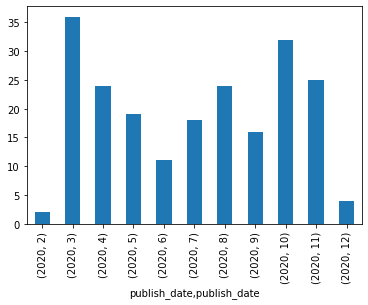

In [66]:
posts_yearmonth_grouped.size().plot.bar() # ovenstående som søjlediagram